In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install keras-self-attention


  Preparing metadata (setup.py) ... done
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18894 sha256=fc2346390f7898205b2b54ff4a8afd70d3ddda27ba7eabc78f59e162384263c6
  Stored in directory: /root/.cache/pip/wheels/b8/f7/24/607b483144fb9c47b4ba2c5fba6b68e54aeee2d5bf6c05302e
Successfully built keras-self-attention


In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Cross-validation scores: [0.8472505211830139, 0.8335598111152649, 0.829483687877655, 0.84986412525177, 0.848505437374115]
Mean cross-validation score: 0.8417327165603637

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      3709
           1       0.87      0.80      0.83      3652

    accuracy                           0.84      7361
   macro avg       0.84      0.84      0.84      7361
weighted avg       0.84      0.84      0.84      7361



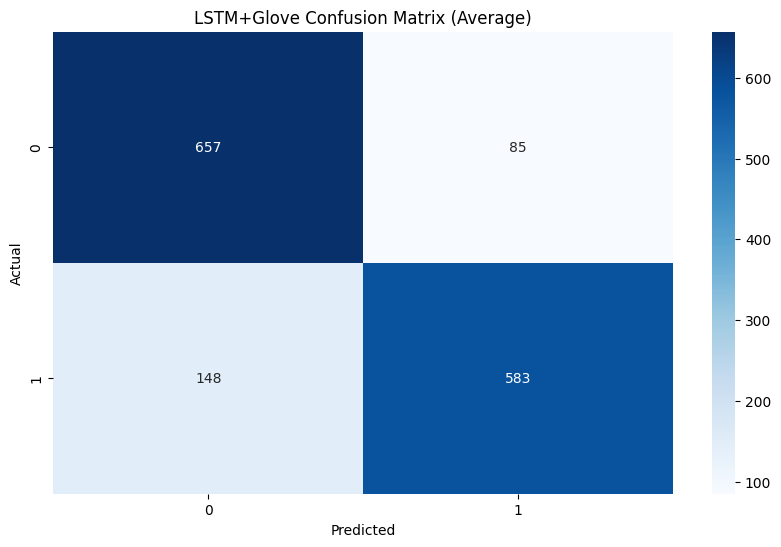

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.6531 - loss: 0.5990
Epoch 2/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8434 - loss: 0.3659
Epoch 3/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8625 - loss: 0.3158
Epoch 4/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8859 - loss: 0.2689
Epoch 5/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8958 - loss: 0.2378
Epoch 6/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9096 - loss: 0.2160
Epoch 7/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9262 - loss: 0.1762
Epoch 8/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9329 - loss: 0.1730
Epoch 9/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9382 - loss: 0.1448
Epoch 10/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9546 - loss: 0.1135


In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras_self_attention import SeqSelfAttention
import seaborn as sns

# GloVe modelini yükleme fonksiyonu
def load_glove_model(glove_file):
    glove_model = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            glove_model[word] = vector
    return glove_model

# GloVe vektörlerini yükle
glove_file = '/content/drive/My Drive/vectors.txt'
glove_model = load_glove_model(glove_file)

# Veri ön işleme fonksiyonu
def process_msg(text):
    text = re.sub(r'(@|https?)\S+|#', '', text)
    filters = '@!"\'#$%&()*+,-./:;<=>[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    text = text.lower().strip()
    stop_words = set(stopwords.words('turkish'))
    words = word_tokenize(text)
    words_filtered = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words_filtered)

# Veriyi yükleme ve ön işleme
xt = pd.read_excel('/content/drive/My Drive/half29072024_teknofest.xlsx')
xt = xt.dropna()
xt['mesaj'] = xt['mesaj'].astype(str).apply(process_msg)

# Etiketleri sayısal değerlere dönüştür
y = xt['label']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Metinleri kelime listelerine çevirme
X_processed = [text.split() for text in xt['mesaj']]

# GloVe vektörlerini embedding matrise çevirme ve padding yapma
max_len = 100  # Maksimum dizi uzunluğu
embedding_dim = 300  # GloVe vektör boyutu
embedding_matrix = np.zeros((len(glove_model) + 1, embedding_dim))
word_index = {word: i + 1 for i, word in enumerate(glove_model.keys())}
for word, i in word_index.items():
    embedding_matrix[i] = glove_model[word]

def get_glove_sequences(texts):
    sequences = []
    for text in texts:
        sequence = [word_index.get(word, 0) for word in text]  # Eğer kelime GloVe'de yoksa 0 ekle
        sequences.append(sequence)
    return pad_sequences(sequences, maxlen=max_len)

X_pad = get_glove_sequences(X_processed)

# Modeli oluşturma fonksiyonu
def create_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(word_index) + 1, output_dim=embedding_dim,
                        weights=[embedding_matrix], input_length=max_len, trainable=False))
    model.add(LSTM(128, return_sequences=True))
    model.add(SeqSelfAttention(attention_activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(64))
    model.add(Dropout(0.5))
    model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
conf_matrix_sum = np.zeros((len(np.unique(y_encoded)), len(np.unique(y_encoded))), dtype=np.float32)
all_y_pred = []
all_y_test = []

for train_index, test_index in kfold.split(X_pad):
    model = create_model()
    model.fit(X_pad[train_index], y_encoded[train_index], epochs=10, batch_size=32, verbose=0)
    scores = model.evaluate(X_pad[test_index], y_encoded[test_index], verbose=0)
    cv_scores.append(scores[1])

    y_pred = model.predict(X_pad[test_index])
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Confusion matrix hesaplama ve toplama
    conf_matrix = confusion_matrix(y_encoded[test_index], y_pred_classes)
    conf_matrix_sum += conf_matrix

    all_y_pred.extend(y_pred_classes)
    all_y_test.extend(y_encoded[test_index])

# Confusion Matrix ortalaması
conf_matrix_avg = np.round(conf_matrix_sum / kfold.get_n_splits()).astype(int)

# Performans değerlendirme ve görselleştirme
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

# `target_names`'i string listesi olarak ayarlayın
target_names = list(map(str, label_encoder.classes_))
class_report = classification_report(all_y_test, all_y_pred, target_names=target_names)
print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_avg, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('LSTM+Glove Confusion Matrix (Average)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Modeli eğit ve kaydetme
model = create_model()
model.fit(X_pad, y_encoded, epochs=10, batch_size=32, verbose=1)
model.save('text_classification_model.h5')

# Modeli yükleme ve sınıflandırma fonksiyonu
model = load_model('text_classification_model.h5', custom_objects={'SeqSelfAttention': SeqSelfAttention})

In [7]:
# Modeli yükleme ve sınıflandırma fonksiyonu
model = load_model('text_classification_model.h5', custom_objects={'SeqSelfAttention': SeqSelfAttention})

# Tokenizer'ı tanımlama ve eğitme
tokenizer = Tokenizer()
tokenizer.fit_on_texts(xt['mesaj'])  # Burada X_processed yerine xt['mesaj'] kullanmalısınız

# Kullanıcıdan metin girişi al
def classify_message(message):
    # Metin ön işleme
    message = process_msg(message)

    # Metni sayılara dönüştürme
    message_seq = tokenizer.texts_to_sequences([message])

    # Dizi uzunluğunu ayarlama
    message_pad = pad_sequences(message_seq, maxlen=max_len)

    # Modeli kullanarak sınıflandırma
    prediction = model.predict(message_pad)
    prediction_class = np.argmax(prediction, axis=1)

    # Sınıflandırma sonucunu geri döndürme
    return label_encoder.inverse_transform(prediction_class)[0]

# Komut satırı aracı
if __name__ == "__main__":
    print("Metin sınıflandırma aracına hoş geldiniz. Çıkış yapmak için 'q' girin.")
    while True:
        message = input("Sınıflandırmak istediğiniz metni girin: ")
        if message.lower() == 'q':
            print("Çıkış yapılıyor...")
            break
        prediction = classify_message(message)
        print(f"Tahmin: {prediction}")

Metin sınıflandırma aracına hoş geldiniz. Çıkış yapmak için 'q' girin.
Sınıflandırmak istediğiniz metni girin: salak
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
Tahmin: 1
Sınıflandırmak istediğiniz metni girin: güzel
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Tahmin: 0
Sınıflandırmak istediğiniz metni girin: manyak
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Tahmin: 0
Sınıflandırmak istediğiniz metni girin: q
Çıkış yapılıyor...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Cross-validation scores: [0.8167006373405457, 0.829483687877655, 0.82472825050354, 0.82472825050354, 0.826766312122345]
Mean cross-validation score: 0.8244814276695251

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      3709
           1       0.83      0.82      0.82      3652

    accuracy                           0.82      7361
   macro avg       0.82      0.82      0.82      7361
weighted avg       0.82      0.82      0.82      7361



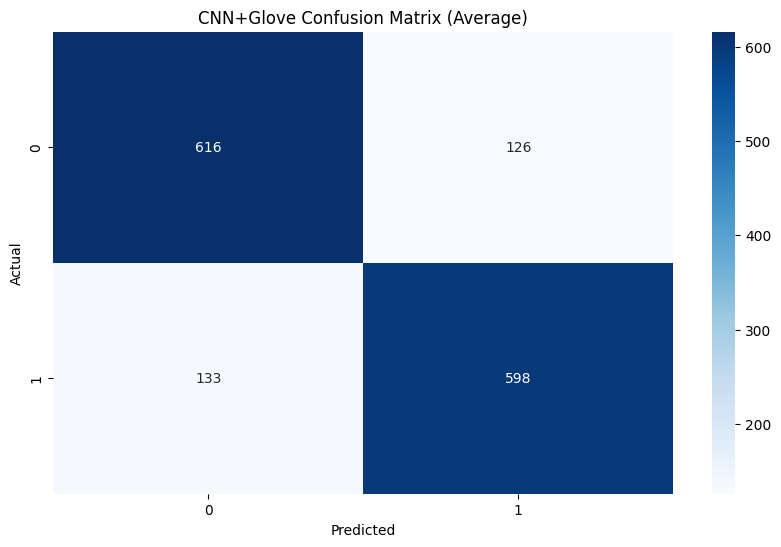

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.6527 - loss: 0.6256
Epoch 2/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8337 - loss: 0.3798
Epoch 3/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8746 - loss: 0.2940
Epoch 4/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9053 - loss: 0.2323
Epoch 5/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9251 - loss: 0.1897
Epoch 6/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9354 - loss: 0.1595
Epoch 7/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9523 - loss: 0.1306
Epoch 8/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9551 - loss: 0.1285
Epoch 9/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9635 - loss: 0.0953
Epoch 10/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9674 - loss: 0.0878


In [12]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras_self_attention import SeqSelfAttention
import seaborn as sns

# GloVe modelini yükleme fonksiyonu
def load_glove_model(glove_file):
    glove_model = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            glove_model[word] = vector
    return glove_model

# GloVe vektörlerini yükle
glove_file = '/content/drive/My Drive/vectors.txt'
glove_model = load_glove_model(glove_file)

# Veri ön işleme fonksiyonu
def process_msg(text):
    text = re.sub(r'(@|https?)\S+|#', '', text)
    filters = '@!"\'#$%&()*+,-./:;<=>[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    text = text.lower().strip()
    stop_words = set(stopwords.words('turkish'))
    words = word_tokenize(text)
    words_filtered = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words_filtered)

# Veriyi yükleme ve ön işleme
xt = pd.read_excel('/content/drive/My Drive/half29072024_teknofest.xlsx')
xt = xt.dropna()
xt['mesaj'] = xt['mesaj'].astype(str).apply(process_msg)

# Etiketleri sayısal değerlere dönüştür
y = xt['label']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Metinleri kelime listelerine çevirme
X_processed = [text.split() for text in xt['mesaj']]

# Metinleri sayılara dönüştürme ve padding yapma
max_len = 100  # Maksimum dizi uzunluğu
embedding_dim = 300  # GloVe vektör boyutu
embedding_matrix = np.zeros((len(glove_model) + 1, embedding_dim))
word_index = {word: i + 1 for i, word in enumerate(glove_model.keys())}
for word, i in word_index.items():
    embedding_matrix[i] = glove_model[word]

def get_glove_sequences(texts):
    sequences = []
    for text in texts:
        sequence = [word_index[word] for word in text if word in word_index]
        sequences.append(sequence)
    return pad_sequences(sequences, maxlen=max_len)

X_pad = get_glove_sequences(X_processed)

# Modeli oluşturma fonksiyonu
def create_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(word_index) + 1, output_dim=embedding_dim,
                        weights=[embedding_matrix], input_length=max_len, trainable=False))
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))  # Konvolüsyon katmanı
    model.add(MaxPooling1D(pool_size=2))  # Max pooling katmanı
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))  # İkinci konvolüsyon katmanı
    model.add(MaxPooling1D(pool_size=2))  # İkinci max pooling katmanı
    model.add(SeqSelfAttention(attention_activation='sigmoid'))  # Attention katmanı
    model.add(GlobalMaxPooling1D())  # Global max pooling katmanı
    model.add(Dropout(0.5))  # Dropout katmanı
    model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Çıkış katmanı
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
conf_matrix_sum = np.zeros((len(np.unique(y_encoded)), len(np.unique(y_encoded))), dtype=np.float32)
all_y_pred = []
all_y_test = []

for train_index, test_index in kfold.split(X_pad):
    model = create_model()
    model.fit(X_pad[train_index], y_encoded[train_index], epochs=10, batch_size=32, verbose=0)
    scores = model.evaluate(X_pad[test_index], y_encoded[test_index], verbose=0)
    cv_scores.append(scores[1])

    y_pred = model.predict(X_pad[test_index])
    y_pred_classes = np.argmax(y_pred, axis=1)
    all_y_pred.extend(y_pred_classes)
    all_y_test.extend(y_encoded[test_index])

    # Confusion matrix hesaplama ve toplama
    conf_matrix = confusion_matrix(y_encoded[test_index], y_pred_classes)
    conf_matrix_sum += conf_matrix

# Confusion Matrix ortalaması
conf_matrix_avg = np.round(conf_matrix_sum / kfold.get_n_splits()).astype(int)

# Performans değerlendirme ve görselleştirme
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

# `target_names`'i string listesi olarak ayarlayın
target_names = list(map(str, label_encoder.classes_))
class_report = classification_report(all_y_test, all_y_pred, target_names=target_names)
print("\nClassification Report:")
print(class_report)

# Confusion Matrix'i grafiksel olarak gösterme
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_avg, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('CNN+Glove Confusion Matrix (Average)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Modeli eğit ve kaydet
model = create_model()
model.fit(X_pad, y_encoded, epochs=10, batch_size=32, verbose=1)
model.save('text_classification_model.h5')

In [13]:
# Modeli yükleme ve sınıflandırma fonksiyonu
model = load_model('text_classification_model.h5', custom_objects={'SeqSelfAttention': SeqSelfAttention})

# Tokenizer'ı tanımlama ve eğitme
tokenizer = Tokenizer()
tokenizer.fit_on_texts(xt['mesaj'])  # Burada X_processed yerine xt['mesaj'] kullanmalısınız

# Kullanıcıdan metin girişi al
def classify_message(message):
    # Metin ön işleme
    message = process_msg(message)

    # Metni sayılara dönüştürme
    message_seq = tokenizer.texts_to_sequences([message])

    # Dizi uzunluğunu ayarlama
    message_pad = pad_sequences(message_seq, maxlen=max_len)

    # Modeli kullanarak sınıflandırma
    prediction = model.predict(message_pad)
    prediction_class = np.argmax(prediction, axis=1)

    # Sınıflandırma sonucunu geri döndürme
    return label_encoder.inverse_transform(prediction_class)[0]

# Komut satırı aracı
if __name__ == "__main__":
    print("Metin sınıflandırma aracına hoş geldiniz. Çıkış yapmak için 'q' girin.")
    while True:
        message = input("Sınıflandırmak istediğiniz metni girin: ")
        if message.lower() == 'q':
            print("Çıkış yapılıyor...")
            break
        prediction = classify_message(message)
        print(f"Tahmin: {prediction}")

Metin sınıflandırma aracına hoş geldiniz. Çıkış yapmak için 'q' girin.
Sınıflandırmak istediğiniz metni girin: deli
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Tahmin: 0
Sınıflandırmak istediğiniz metni girin: manyak
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Tahmin: 0
Sınıflandırmak istediğiniz metni girin: q
Çıkış yapılıyor...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Cross-validation scores: [0.8540393710136414, 0.8349184989929199, 0.8308423757553101, 0.842391312122345, 0.8478260636329651]
Mean cross-validation score: 0.8420035243034363

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      3709
           1       0.87      0.81      0.84      3652

    accuracy                           0.84      7361
   macro avg       0.84      0.84      0.84      7361
weighted avg       0.84      0.84      0.84      7361



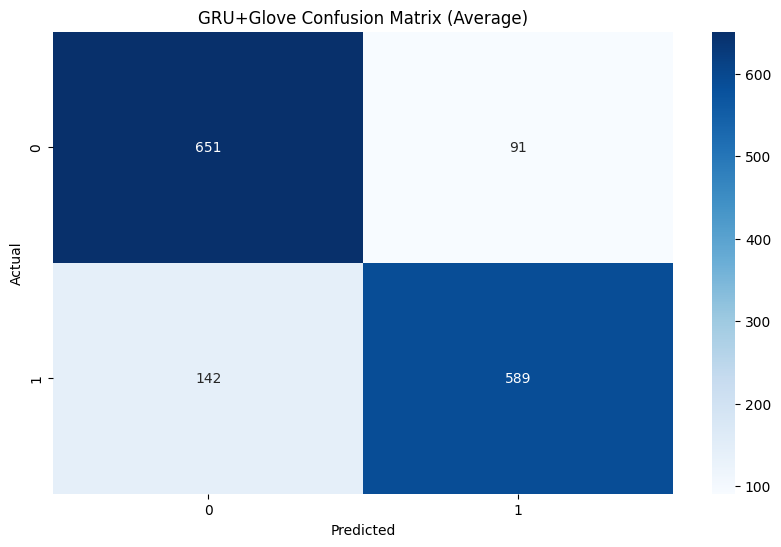

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.6908 - loss: 0.5808
Epoch 2/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8355 - loss: 0.3594
Epoch 3/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8722 - loss: 0.2957
Epoch 4/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8834 - loss: 0.2616
Epoch 5/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8955 - loss: 0.2272
Epoch 6/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9136 - loss: 0.1847
Epoch 7/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9347 - loss: 0.1566
Epoch 8/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9467 - loss: 0.1317
Epoch 9/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9399 - loss: 0.1360
Epoch 10/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9541 - loss: 0.1043


In [15]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, GRU, Bidirectional, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras_self_attention import SeqSelfAttention
import seaborn as sns

# GloVe modelini yükleme fonksiyonu
def load_glove_model(glove_file):
    glove_model = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            glove_model[word] = vector
    return glove_model

# GloVe vektörlerini yükle
glove_file = '/content/drive/My Drive/vectors.txt'
glove_model = load_glove_model(glove_file)

# Veri ön işleme fonksiyonu
def process_msg(text):
    text = re.sub(r'(@|https?)\S+|#', '', text)
    filters = '@!"\'#$%&()*+,-./:;<=>[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    text = text.lower().strip()
    stop_words = set(stopwords.words('turkish'))
    words = word_tokenize(text)
    words_filtered = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words_filtered)

# Veriyi yükleme ve ön işleme
xt = pd.read_excel('/content/drive/My Drive/half29072024_teknofest.xlsx')
xt = xt.dropna()
xt['mesaj'] = xt['mesaj'].astype(str).apply(process_msg)

# Etiketleri sayısal değerlere dönüştür
y = xt['label']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Metinleri kelime listelerine çevirme
X_processed = [text.split() for text in xt['mesaj']]

# GloVe vektörlerini embedding matrise çevirme ve padding yapma
max_len = 100  # Maksimum dizi uzunluğu
embedding_dim = 300  # GloVe vektör boyutu
embedding_matrix = np.zeros((len(glove_model) + 1, embedding_dim))
word_index = {word: i + 1 for i, word in enumerate(glove_model.keys())}
for word, i in word_index.items():
    embedding_matrix[i] = glove_model[word]

def get_glove_sequences(texts):
    sequences = []
    for text in texts:
        sequence = [word_index.get(word, 0) for word in text]  # Eğer kelime GloVe'de yoksa 0 ekle
        sequences.append(sequence)
    return pad_sequences(sequences, maxlen=max_len)

X_pad = get_glove_sequences(X_processed)

# Modeli oluşturma fonksiyonu
def create_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(word_index) + 1, output_dim=embedding_dim,
                        weights=[embedding_matrix], input_length=max_len, trainable=False))
    model.add(Bidirectional(GRU(128, return_sequences=True)))
    model.add(SeqSelfAttention(attention_activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(GRU(64))
    model.add(Dropout(0.5))
    model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
conf_matrix_sum = np.zeros((len(np.unique(y_encoded)), len(np.unique(y_encoded))), dtype=np.float32)
all_y_pred = []
all_y_test = []

for train_index, test_index in kfold.split(X_pad):
    model = create_model()
    model.fit(X_pad[train_index], y_encoded[train_index], epochs=10, batch_size=32, verbose=0)
    scores = model.evaluate(X_pad[test_index], y_encoded[test_index], verbose=0)
    cv_scores.append(scores[1])

    y_pred = model.predict(X_pad[test_index])
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Confusion matrix hesaplama ve toplama
    conf_matrix = confusion_matrix(y_encoded[test_index], y_pred_classes)
    conf_matrix_sum += conf_matrix

    all_y_pred.extend(y_pred_classes)
    all_y_test.extend(y_encoded[test_index])

# Confusion Matrix ortalaması
conf_matrix_avg = np.round(conf_matrix_sum / kfold.get_n_splits()).astype(int)

# Performans değerlendirme ve görselleştirme
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

# `target_names`'i string listesi olarak ayarlayın
target_names = list(map(str, label_encoder.classes_))
class_report = classification_report(all_y_test, all_y_pred, target_names=target_names)
print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_avg, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('GRU+Glove Confusion Matrix (Average)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Modeli eğit ve kaydetme
model = create_model()
model.fit(X_pad, y_encoded, epochs=10, batch_size=32, verbose=1)
model.save('text_classification_model.h5')

# Modeli yükleme ve sınıflandırma fonksiyonu
model = load_model('text_classification_model.h5', custom_objects={'SeqSelfAttention': SeqSelfAttention})



In [18]:
def classify_message(message):
    message = process_msg(message)
    message_seq = [word_index.get(word, 0) for word in message.split()]
    message_pad = pad_sequences([message_seq], maxlen=max_len)

    prediction = model.predict(message_pad)
    prediction_class = np.argmax(prediction, axis=1)
    return label_encoder.inverse_transform(prediction_class)[0]

# Test ekranı ve bitirme seçeneği
while True:
    message = input("Sınıflandırmak istediğiniz metni girin (çıkış için 'q' girin): ")
    if message.lower() == 'q':
        print("Test ekranından çıkılıyor...")
        break
    prediction = classify_message(message)
    print(f"Tahmin: {prediction}")

    another_question = input("Başka bir sorunuz var mı? (evet/hayır): ")
    if another_question.lower() != 'evet':
        print("Çıkış yapılıyor...")
        break

Sınıflandırmak istediğiniz metni girin (çıkış için 'q' girin): deli
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Tahmin: 1
Başka bir sorunuz var mı? (evet/hayır): evet
Sınıflandırmak istediğiniz metni girin (çıkış için 'q' girin): güzel
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Tahmin: 0
Başka bir sorunuz var mı? (evet/hayır): evet
Sınıflandırmak istediğiniz metni girin (çıkış için 'q' girin): hayvan
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Tahmin: 1
Başka bir sorunuz var mı? (evet/hayır): evet
Sınıflandırmak istediğiniz metni girin (çıkış için 'q' girin): ne çok hoşsun
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Tahmin: 1
Başka bir sorunuz var mı? (evet/hayır): hayır
Çıkış yapılıyor...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Cross-validation scores: [0.8499660491943359, 0.8240489363670349, 0.8349184989929199, 0.8383151888847351, 0.8505434989929199]
Mean cross-validation score: 0.8395584344863891

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      3709
           1       0.86      0.81      0.83      3652

    accuracy                           0.84      7361
   macro avg       0.84      0.84      0.84      7361
weighted avg       0.84      0.84      0.84      7361



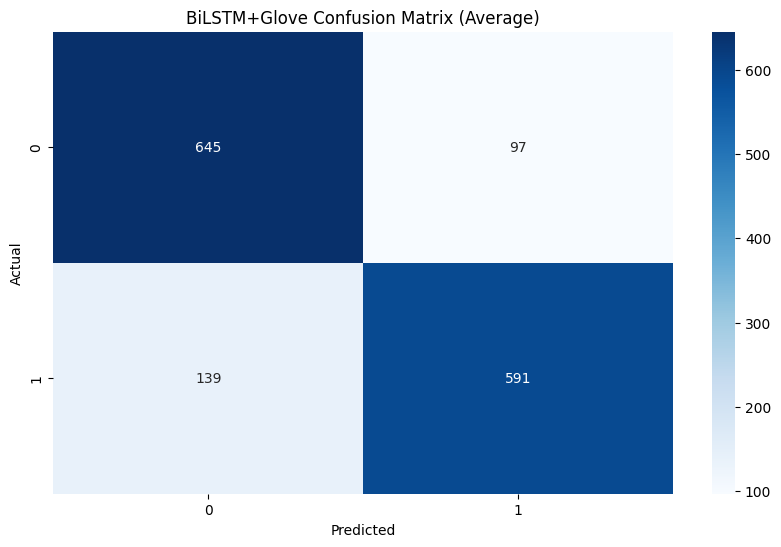

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.6999 - loss: 0.5602
Epoch 2/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.8447 - loss: 0.3455
Epoch 3/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.8569 - loss: 0.3160
Epoch 4/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8822 - loss: 0.2699
Epoch 5/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8990 - loss: 0.2323
Epoch 6/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9122 - loss: 0.2111
Epoch 7/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9295 - loss: 0.1703
Epoch 8/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9397 - loss: 0.1515
Epoch 9/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9432 - loss: 0.1379
Epoch 10/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9535 - loss: 0.1109


In [21]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras_self_attention import SeqSelfAttention
import seaborn as sns

# GloVe modelini yükleme fonksiyonu
def load_glove_model(glove_file):
    glove_model = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            glove_model[word] = vector
    return glove_model

# GloVe vektörlerini yükle
glove_file = '/content/drive/My Drive/vectors.txt'
glove_model = load_glove_model(glove_file)

# Veri ön işleme fonksiyonu
def process_msg(text):
    text = re.sub(r'(@|https?)\S+|#', '', text)
    filters = '@!"\'#$%&()*+,-./:;<=>[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    text = text.lower().strip()
    stop_words = set(stopwords.words('turkish'))
    words = word_tokenize(text)
    words_filtered = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words_filtered)

# Veriyi yükleme ve ön işleme
xt = pd.read_excel('/content/drive/My Drive/half29072024_teknofest.xlsx')
xt = xt.dropna()
xt['mesaj'] = xt['mesaj'].astype(str).apply(process_msg)

# Etiketleri sayısal değerlere dönüştür
y = xt['label']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Metinleri kelime listelerine çevirme
X_processed = [text.split() for text in xt['mesaj']]

# GloVe vektörlerini embedding matrise çevirme ve padding yapma
max_len = 100  # Maksimum dizi uzunluğu
embedding_dim = 300  # GloVe vektör boyutu
embedding_matrix = np.zeros((len(glove_model) + 1, embedding_dim))
word_index = {word: i + 1 for i, word in enumerate(glove_model.keys())}
for word, i in word_index.items():
    embedding_matrix[i] = glove_model[word]

def get_glove_sequences(texts):
    sequences = []
    for text in texts:
        sequence = [word_index.get(word, 0) for word in text if word in word_index]
        sequences.append(sequence)
    return pad_sequences(sequences, maxlen=max_len)

X_pad = get_glove_sequences(X_processed)

# Modeli oluşturma fonksiyonu
def create_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(word_index) + 1, output_dim=embedding_dim,
                        weights=[embedding_matrix], input_length=max_len, trainable=False))
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(SeqSelfAttention(attention_activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dropout(0.5))
    model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
conf_matrix_sum = np.zeros((len(np.unique(y_encoded)), len(np.unique(y_encoded))), dtype=np.float32)
all_y_pred = []
all_y_test = []

for train_index, test_index in kfold.split(X_pad):
    model = create_model()
    model.fit(X_pad[train_index], y_encoded[train_index], epochs=10, batch_size=32, verbose=0)
    scores = model.evaluate(X_pad[test_index], y_encoded[test_index], verbose=0)
    cv_scores.append(scores[1])

    y_pred = model.predict(X_pad[test_index])
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Confusion matrix hesaplama ve toplama
    conf_matrix = confusion_matrix(y_encoded[test_index], y_pred_classes)
    conf_matrix_sum += conf_matrix

    all_y_pred.extend(y_pred_classes)
    all_y_test.extend(y_encoded[test_index])

# Confusion Matrix ortalaması
conf_matrix_avg = np.round(conf_matrix_sum / kfold.get_n_splits()).astype(int)

# Performans değerlendirme ve görselleştirme
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

# `target_names`'i string listesi olarak ayarlayın
target_names = list(map(str, label_encoder.classes_))
class_report = classification_report(all_y_test, all_y_pred, target_names=target_names)
print("\nClassification Report:")
print(class_report)

# Confusion Matrix'i grafiksel olarak gösterme
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_avg, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('BiLSTM+Glove Confusion Matrix (Average)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Modeli eğit ve kaydet
model = create_model()
model.fit(X_pad, y_encoded, epochs=10, batch_size=32, verbose=1)
model.save('text_classification_model.h5')

# Modeli yükleme ve sınıflandırma fonksiyonu
model = load_model('text_classification_model.h5', custom_objects={'SeqSelfAttention': SeqSelfAttention})



In [24]:
def classify_message(message):
    message = process_msg(message)
    message_seq = [word_index.get(word, 0) for word in message.split()]
    message_pad = pad_sequences([message_seq], maxlen=max_len)

    prediction = model.predict(message_pad)
    prediction_class = np.argmax(prediction, axis=1)
    return label_encoder.inverse_transform(prediction_class)[0]

# Test ekranı ve bitirme seçeneği
while True:
    message = input("Sınıflandırmak istediğiniz metni girin (çıkış için 'q' girin): ")
    if message.lower() == 'q':
        print("Test ekranından çıkılıyor...")
        break
    prediction = classify_message(message)
    print(f"Tahmin: {prediction}")

    another_question = input("Başka bir sorunuz var mı? (evet/hayır): ")
    if another_question.lower() != 'evet':
        print("Çıkış yapılıyor...")
        break

Sınıflandırmak istediğiniz metni girin (çıkış için 'q' girin): salak
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Tahmin: 1
Başka bir sorunuz var mı? (evet/hayır): evet
Sınıflandırmak istediğiniz metni girin (çıkış için 'q' girin): merhaba
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Tahmin: 1
Başka bir sorunuz var mı? (evet/hayır): evet
Sınıflandırmak istediğiniz metni girin (çıkış için 'q' girin): nasılsın
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Tahmin: 0
Başka bir sorunuz var mı? (evet/hayır): evet
Sınıflandırmak istediğiniz metni girin (çıkış için 'q' girin): köpek
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Tahmin: 1
Başka bir sorunuz var mı? (evet/hayır): hayır
Çıkış yapılıyor...
